In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
BreastCancer = pd.read_csv('Breast-Cancer.csv')

In [3]:
BreastCancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
BreastCancer.shape

(116, 10)

In [5]:
BreastCancer['Classification'].unique()

array([1, 2], dtype=int64)

In [6]:
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:
columns_to_drop = ["HOMA", "BMI", "Adiponectin", "Resistin", "MCP.1"]
BreastCancer.drop(columns=columns_to_drop, inplace=True)
BreastCancer.isnull().sum()

Age               0
Glucose           0
Insulin           0
Leptin            0
Classification    0
dtype: int64

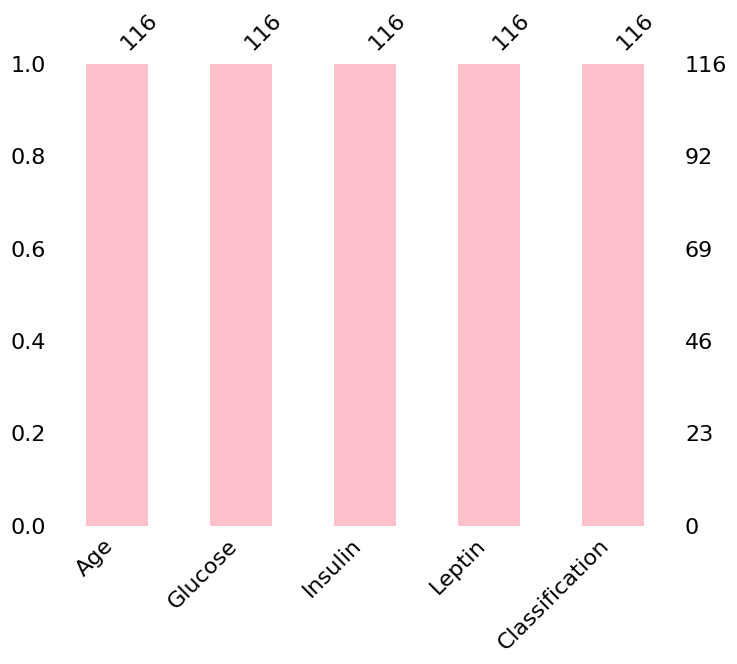

In [8]:
import missingno as msno
msno.bar(BreastCancer, figsize =(8,6), color="pink")
plt.show()

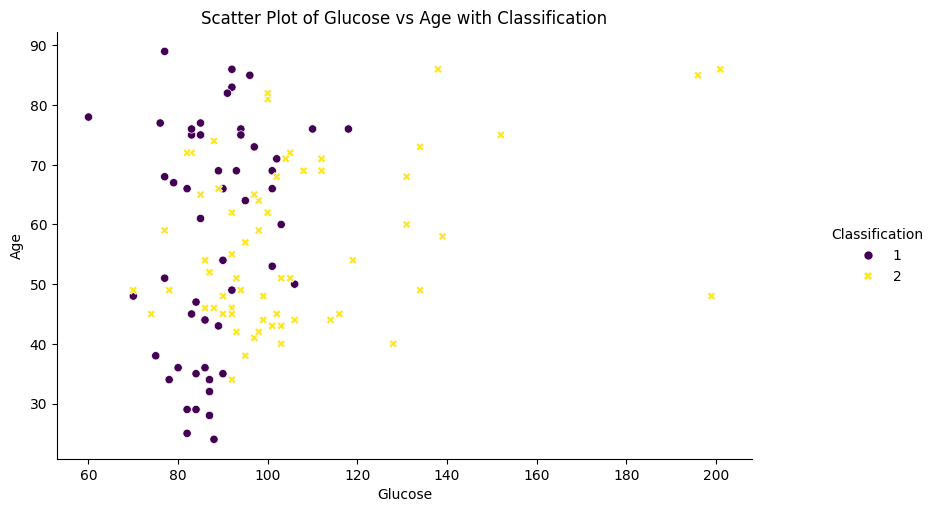

In [9]:
g = sns.relplot(x='Glucose', y='Age', data=BreastCancer, hue='Classification', style='Classification', palette='viridis')
g.fig.set_size_inches(10, 5)
plt.title('Scatter Plot of Glucose vs Age with Classification')
plt.show()

In [10]:
# cek korelasi antar fitur
numeric_columns = BreastCancer.select_dtypes(include=[float, int]).columns
BreastCancer_numeric = BreastCancer[numeric_columns]
BreastCancer_numeric.corr()

,Age,Glucose,Insulin,Leptin,Classification
Age,1.000000,0.230106,0.032495,0.102626,-0.043555
Glucose,0.230106,1.000000,0.504653,0.305080,0.384315
Insulin,0.032495,0.504653,1.000000,0.301462,0.276804
Leptin,0.102626,0.305080,0.301462,1.000000,-0.001078
Classification,-0.043555,0.384315,0.276804,-0.001078,1.000000


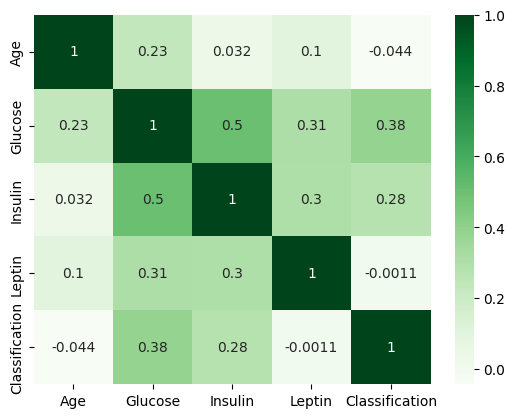

In [11]:
# Draw heatmap
sns.heatmap(BreastCancer_numeric.corr(), annot=True, cmap='Greens')
plt.show()

In [12]:
# pisahkan antara fitur dan label
x=BreastCancer.drop('Classification', axis=1)
y= BreastCancer['Classification']

In [13]:
x

,Age,Glucose,Insulin,Leptin
0,48,70,2.707,8.8071
1,83,92,3.115,8.8438
2,82,91,4.498,17.9393
3,68,77,3.226,9.8827
4,86,92,3.549,6.6994
...,...,...,...,...
111,45,92,3.330,54.6800
112,62,100,4.530,12.4500
113,65,97,5.730,61.4800
114,72,82,2.820,24.9600


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print('The shape of x_train is :{}'. format(x_train.shape))
print('The shape of x_test is :{}'. format(x_test.shape))
print('The shape of y_train is :{}'. format(y_train.shape))
print('The shape of y_test is :{}'. format(y_test.shape))

The shape of x_train is :(92, 4)
The shape of x_test is :(24, 4)
The shape of y_train is :(92,)
The shape of y_test is :(24,)


In [17]:
# Model Training
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [18]:
# Prediksi pada data train
pred_train = model.predict(x_train)

cm = confusion_matrix(y_train, pred_train)

# confusion matrix
print('confusion matrix naive Bayes\n',cm)
print('')

# akurasi
print('Akurasi pada saat training:{}'. format(accuracy_score(y_train,pred_train)))

confusion matrix naive Bayes
 [[35  6]
 [27 24]]

Akurasi pada saat training:0.6413043478260869


In [19]:
# Prediksi pada data test
pred_test= model.predict(x_test)

cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test,pred_test)
precision = precision_score(y_test,pred_test, average='micro')
recall = recall_score(y_test,pred_test, average='micro')
f1 = f1_score(y_test,pred_test, average='micro')
print('confusion matrix naive Bayes\n',cm)
print('')

print('Akurasi pada test: %.3f' %accuracy)
print('recall: %.3f' %recall)
print('precision: %.3f' %precision)
print('f1: %.3f' %f1)

confusion matrix naive Bayes
 [[8 3]
 [7 6]]

Akurasi pada test: 0.583
recall: 0.583
precision: 0.583
f1: 0.583
